In [ ]:
! pip install requests

Image saved to generated_image_20251025_140715_1.png


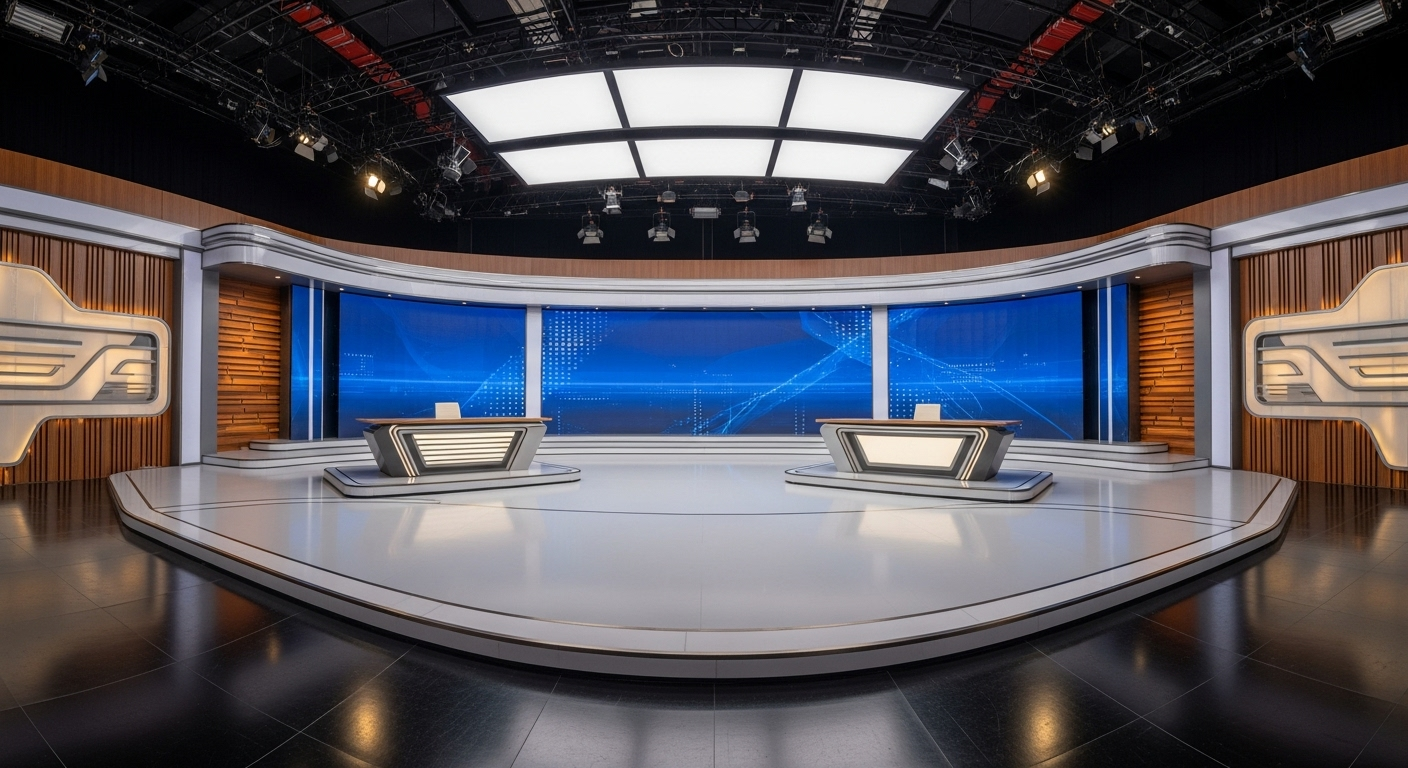


revised_prompt None
Image saved to generated_image_20251025_140715_2.png


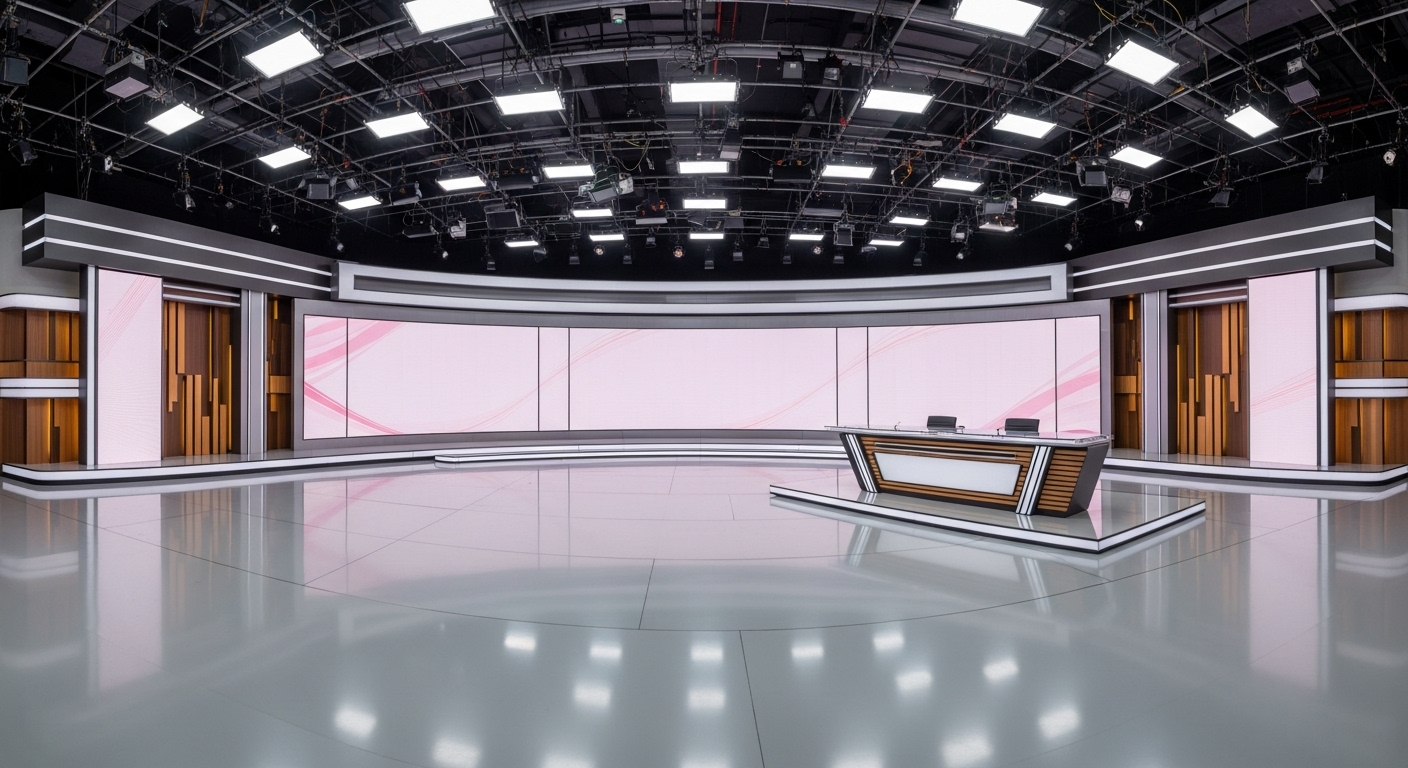


revised_prompt None
Image saved to generated_image_20251025_140715_3.png


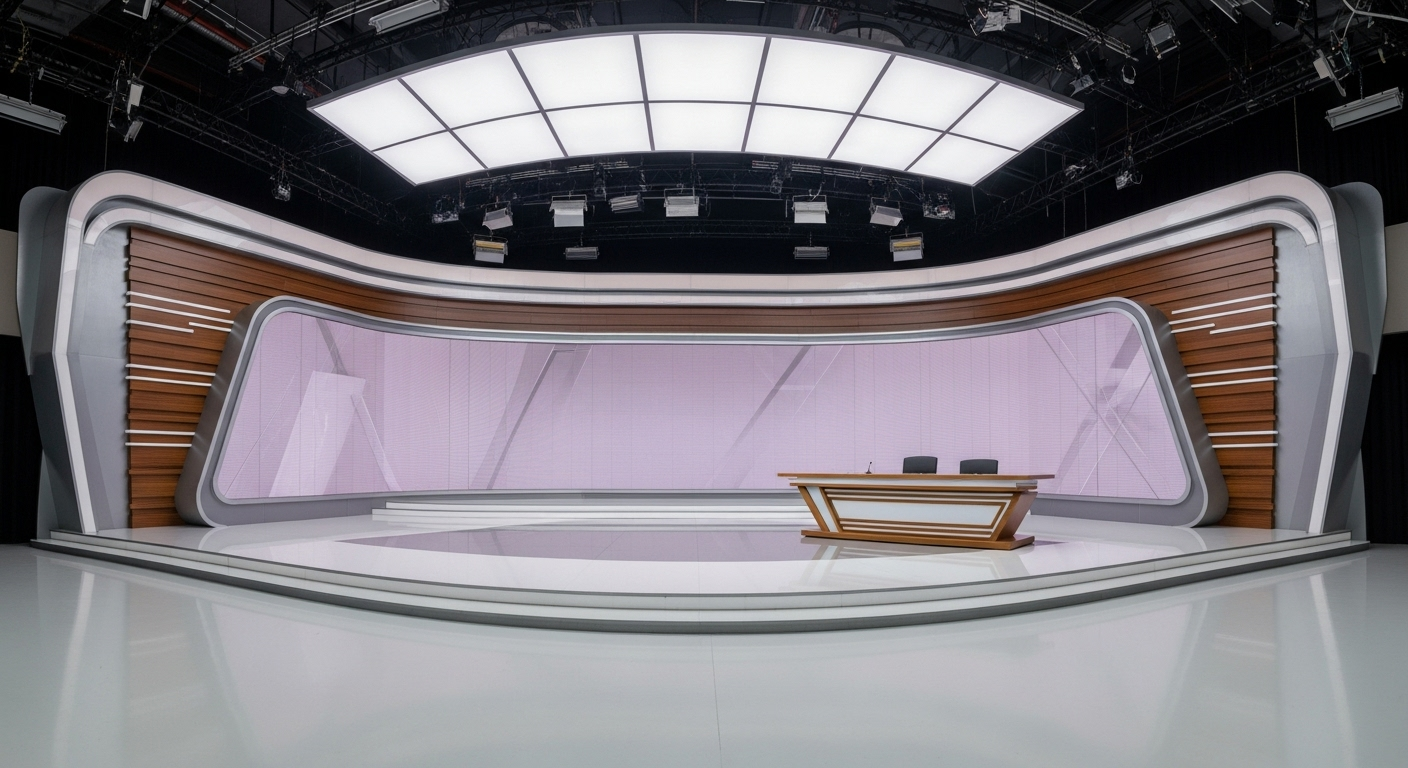


revised_prompt None


In [2]:

import requests
import json
import base64
from datetime import datetime
from IPython.display import display, Image as IPyImage

AI_API_BASE = "https://api.thucchien.ai"
AI_API_KEY = "sk-ug1poexeERrICjPNvLSooQ"  # Khuyến nghị: dùng biến môi trường thay vì hard-code

url = f"{AI_API_BASE}/images/generations"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {AI_API_KEY}"
}
data = {
    # 'images': "",
    "model": "imagen-4",
    # "prompt": "Create a full-body photorealistic image of a virtual Asian TV news presenter, inspired by the professional style of Vietnamese national television. The presenter faces the camera (front view), standing tall with a gentle, graceful shift in posture to suggest slight movement. Shoulder-length straight black hair. Cheerful, friendly expression. Wearing a traditional Vietnamese áo dài in bright red with a single large five-point yellow star centered on the chest; flowing panels and simple matching pants. Seamless white studio background. Professional soft key light with subtle rim light, natural skin tones, crisp focus from head to toe. Vertical portrait composition, subject centered, entire body in frame. High dynamic range, ultra-detailed, 4K. No text, no logos, no watermark.",
    "prompt": "Create an empty indoor TV news studio inspired by modern Vietnamese national television sets — no logos or text. Ultra-wide panoramic view that captures the entire studio in a 16:9 frame (3840×2160). Cinematic wide-angle lens (≈16–20 mm full-frame). A luxurious, contemporary stage made of modern materials (brushed metal, glass, polished stone, warm wood accents). A long, curved LED wall runs across the stage in a wide arc; its height is exactly half the stage height. Place a long anchor desk close to the LED wall; the LED wall is clearly taller than the desk. Leave a generous open floor area in front of the desk large enough for multiple people to stand. Clean broadcast lighting with soft overhead grids, subtle rim and floor reflections; neutral white balance. Composition centered and symmetrical with clear leading lines. Photorealistic, HDR, ultra-detailed, 4K. No people, no watermarks, no extra text.",
    "n": 3,                     # <-- int, không phải chuỗi
    "aspect_ratio": "16:9"
}

response = requests.post(url, headers=headers, data=json.dumps(data))

if response.ok:
    result = response.json()
    items = result["data"]

    for idx, item in enumerate(items, start=1): 
        # Lấy ảnh (b64 hoặc url)
        if "b64_json" in item and item["b64_json"]:
            img_bytes = base64.b64decode(item["b64_json"])
            revised_prompt = item["revised_prompt"]
        elif "url" in item and item["url"]:
            # fallback nếu server trả về URL thay vì base64
            img_resp = requests.get(item["url"])
            img_resp.raise_for_status()
            img_bytes = img_resp.content
        else:
            raise RuntimeError("No image content found in response.")

        # Tên file tự động theo timestamp
        ts = datetime.now().strftime("%Y%m%d_%H%M%S")
        fname = f"generated_image_{ts}_{idx}.png"
        with open(fname, "wb") as f:
            f.write(img_bytes)

        print(f"Image saved to {fname}")
        # Hiển thị ngay trong notebook
        display(IPyImage(data=img_bytes))
        print()
        print('revised_prompt', revised_prompt)
else:
    print(f"Error: {response.status_code}")
    try:
        print(response.json())
    except Exception:
        print(response.text)
